In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

csv_file = '/root/workspace/GRE/log/99_1_2_3_covid_osm_btreeolc_artolc_alex_lipp/out.csv'

In [3]:
df = pd.read_csv(csv_file)

# group by as key_path index_type init_table_size test_suite
df_grouped = df.groupby(['key_path', 'index_type', 'init_table_size', 'test_suite'])

# construct a new dataframe for each group
df_new = pd.DataFrame(columns=['key_path', 'index_type', 'init_table_size', 'test_suite',
                               'insert_throughput_avg', 'insert_throughput_min', 'insert_throughput_max', 'insert_throughput_stdv',
                               'read_throughput_avg', 'read_throughput_min', 'read_throughput_max', 'read_throughput_stdv'])
for name, group in df_grouped:
    key_path, index_type, init_table_size, test_suite = name
    insert_throughput_avg = group.loc[group['insert_ratio'] == 1, 'throughput'].mean()
    insert_throughput_min= group.loc[group['insert_ratio'] == 1, 'throughput'].min()
    insert_throughput_max= group.loc[group['insert_ratio'] == 1, 'throughput'].max()
    insert_throughput_stdv= group.loc[group['insert_ratio'] == 1, 'throughput'].std()
    read_throughput_avg = group.loc[group['insert_ratio'] == 0, 'throughput'].mean()
    read_throughput_min= group.loc[group['insert_ratio'] == 0, 'throughput'].min()
    read_throughput_max= group.loc[group['insert_ratio'] == 0, 'throughput'].max()
    read_throughput_stdv= group.loc[group['insert_ratio'] == 0, 'throughput'].std()
    df_new.loc[len(df_new)] = [key_path, index_type, init_table_size, test_suite, insert_throughput_avg, insert_throughput_min, insert_throughput_max, insert_throughput_stdv, read_throughput_avg, read_throughput_min, read_throughput_max, read_throughput_stdv]

df_new

,key_path,index_type,init_table_size,test_suite,insert_throughput_avg,insert_throughput_min,insert_throughput_max,insert_throughput_stdv,read_throughput_avg,read_throughput_min,read_throughput_max,read_throughput_stdv
0,datasets/covid,alex,1000000,1,2424220.6,2349573,2465134,47387.629528,7688643.8,7429405.0,7917416.0,239558.789713
1,datasets/covid,alex,1000000,2,2089778.2,2075310,2096902,10074.357756,5831704.2,5802283.0,5880946.0,36537.374094
2,datasets/covid,alex,1000000,3,2080053.6,2067794,2098190,12185.282077,5859683.6,5792089.0,5928118.0,53325.787958
3,datasets/covid,alex,1000000,4,2199248.6,2168938,2238814,27920.159111,7780486.0,7738364.0,7821646.0,38253.123186
4,datasets/covid,alex,1000000,99,2421948.6,2402798,2434330,12157.269545,6648736.0,6493286.0,6724455.0,93728.345744
...,...,...,...,...,...,...,...,...,...,...,...,...
766,datasets/planet,lipp,100000000,1,1347716.8,1330743,1360096,11621.099526,2693238.6,2663965.0,2736678.0,27673.455138
767,datasets/planet,lipp,100000000,2,1430451.4,1416135,1443879,12454.399576,2665339.8,2642253.0,2685547.0,20106.065446
768,datasets/planet,lipp,100000000,3,1340613.2,1312053,1359950,18362.683728,2703885.8,2681818.0,2737555.0,24186.274366
769,datasets/planet,lipp,100000000,4,1575062.0,1475705,1608764,56752.967006,2968067.0,2936445.0,2988799.0,21372.953364


In [4]:
# scale the throughput
df_new_scaled = df_new.copy()

for name, group in df_new_scaled.groupby(['key_path', 'index_type', 'init_table_size']):
    key_path_inner, index_type_inner, init_table_size_inner = name
    insert_baseline=df_new_scaled[(df_new_scaled['test_suite'] == 99) & (df_new_scaled['key_path'] == key_path_inner) & (df_new_scaled['index_type'] == index_type_inner) & (df_new_scaled['init_table_size'] == init_table_size_inner)]['insert_throughput_avg'].values[0]
    read_baseline=df_new_scaled[(df_new_scaled['test_suite'] == 99) & (df_new_scaled['key_path'] == key_path_inner) & (df_new_scaled['index_type'] == index_type_inner) & (df_new_scaled['init_table_size'] == init_table_size_inner)]['read_throughput_avg'].values[0]
    df_new_scaled.loc[(df_new_scaled['key_path'] == key_path_inner) & (df_new_scaled['index_type'] == index_type_inner) & (df_new_scaled['init_table_size'] == init_table_size_inner), 'insert_throughput_avg'] = df_new_scaled.loc[(df_new_scaled['key_path'] == key_path_inner) & (df_new_scaled['index_type'] == index_type_inner) & (df_new_scaled['init_table_size'] == init_table_size_inner), 'insert_throughput_avg'] / insert_baseline
    df_new_scaled.loc[(df_new_scaled['key_path'] == key_path_inner) & (df_new_scaled['index_type'] == index_type_inner) & (df_new_scaled['init_table_size'] == init_table_size_inner), 'read_throughput_avg'] = df_new_scaled.loc[(df_new_scaled['key_path'] == key_path_inner) & (df_new_scaled['index_type'] == index_type_inner) & (df_new_scaled['init_table_size'] == init_table_size_inner), 'read_throughput_avg'] / read_baseline
    

Text(0.5, 1.0, 'read_throughput_avg of dytis on datasets/osm')

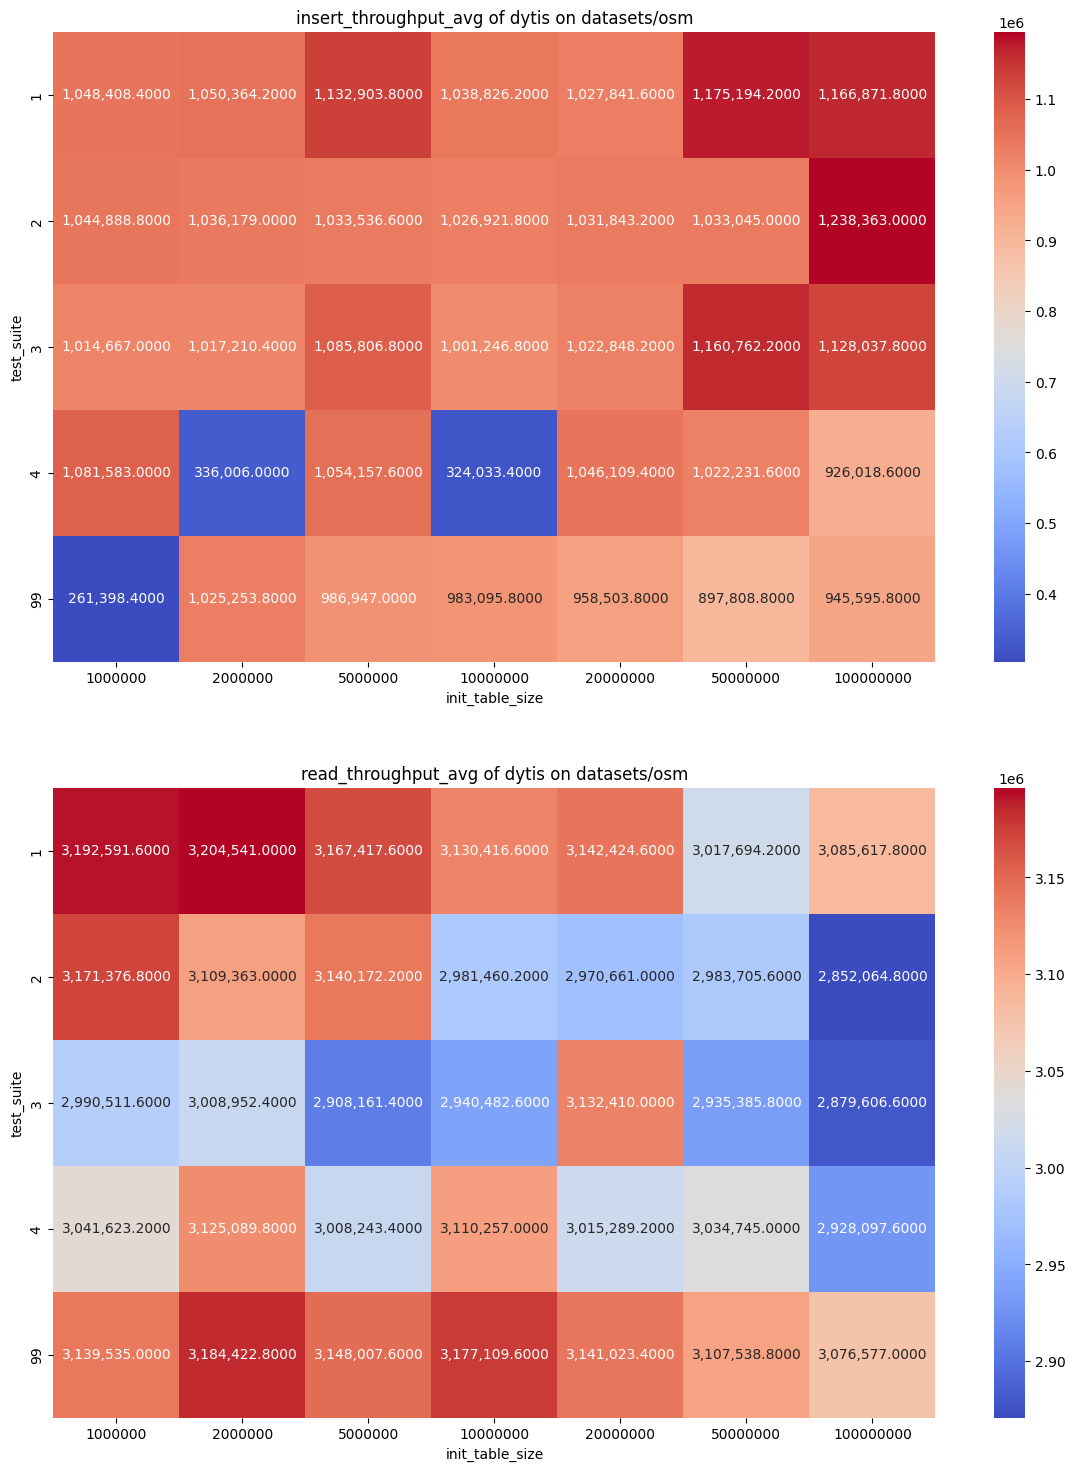

In [6]:
# plot a heatmap
# x-axis: test_suite y-axis: init_table_size hue: insert_throughput_avg
# test_suite = 99 be the baseline, and other will be devided by the baseline
index_type = 'dytis'
key_path = 'datasets/osm'

df_new_filtered = df_new[(df_new['index_type'] == index_type) & (df_new['key_path'] == key_path)]
# df_new_filtered = df_new_scaled[(df_new['index_type'] == index_type) & (df_new['key_path'] == key_path)]

plt.figure(figsize=(15, 18))
plt.subplot(2, 1, 1)
sns.heatmap(df_new_filtered.pivot(index='test_suite', columns='init_table_size', values='insert_throughput_avg'), annot=True, fmt=",.4f", robust=True, square=True, cmap='coolwarm')
plt.title(f'insert_throughput_avg of {index_type} on {key_path}')

plt.subplot(2, 1, 2)
sns.heatmap(df_new_filtered.pivot(index='test_suite', columns='init_table_size', values='read_throughput_avg'), annot=True, fmt=",.4f", robust=True, square=True, cmap='coolwarm')
plt.title(f'read_throughput_avg of {index_type} on {key_path}')